# Covid-19 Simple Data Analysis

In [35]:
import requests
import json
from bs4 import BeautifulSoup 
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 7

### Data source

In [36]:
url_json = "https://especiais.g1.globo.com/bemestar/coronavirus/mapa-coronavirus/data/brazil-cases.json"
json_data = requests.get(url_json,headers = {'User-Agent': 'Mozilla/5.0'})

json_data = json_data.json()
updated_at = json_data['updated_at']

print(f"### Última atualização: {updated_at}.")

### Última atualização: 31/03/2020, às 16:21.


### Checking and cleaning data

In [37]:
#df_json[df_json['date']=='Não informado']

In [38]:
#json_data.json()['docs']
df_json = pd.DataFrame(json_data['docs'])
df_json = df_json.sort_values(by='count', ascending=False)

# parse state
df_json['state'] = df_json['state'].astype('str')

# checking date
df_json['date'] = pd.to_datetime(df_json['date'], format='%Y-%m-%d',errors='coerce')

# shape
df_json.shape

(1022, 7)

In [39]:
# remove invalid dates

df_json = df_json.query('date != "NaT"')
    
df_json = df_json.query('city_name != ""')

df_json.shape

(1015, 7)

In [40]:
df_json.dtypes

cases                 int64
city_cod            float64
city_name            object
count                 int64
date         datetime64[ns]
state                object
state_cod           float64
dtype: object

In [41]:
df_json.head(10)

,cases,city_cod,city_name,count,date,state,state_cod
925,15,3550308.0,São Paulo,1272,2020-03-30,SP,35.0
835,29,3550308.0,São Paulo,1257,2020-03-29,SP,35.0
764,166,3550308.0,São Paulo,1228,2020-03-28,SP,35.0
669,135,3550308.0,São Paulo,1062,2020-03-27,SP,35.0
590,171,3550308.0,São Paulo,927,2020-03-26,SP,35.0
520,46,3550308.0,São Paulo,756,2020-03-25,SP,35.0
454,37,3550308.0,São Paulo,710,2020-03-24,SP,35.0
382,91,3550308.0,São Paulo,673,2020-03-23,SP,35.0
337,171,3550308.0,São Paulo,582,2020-03-22,SP,35.0
988,36,3304557.0,Rio de Janeiro,553,2020-03-30,RJ,33.0


In [42]:
df_json.query('city_name == "São Paulo"')

,cases,city_cod,city_name,count,date,state,state_cod
925,15,3550308.0,São Paulo,1272,2020-03-30,SP,35.0
835,29,3550308.0,São Paulo,1257,2020-03-29,SP,35.0
764,166,3550308.0,São Paulo,1228,2020-03-28,SP,35.0
669,135,3550308.0,São Paulo,1062,2020-03-27,SP,35.0
590,171,3550308.0,São Paulo,927,2020-03-26,SP,35.0
520,46,3550308.0,São Paulo,756,2020-03-25,SP,35.0
454,37,3550308.0,São Paulo,710,2020-03-24,SP,35.0
382,91,3550308.0,São Paulo,673,2020-03-23,SP,35.0
337,171,3550308.0,São Paulo,582,2020-03-22,SP,35.0
277,51,3550308.0,São Paulo,411,2020-03-21,SP,35.0


### Analyzing 

In [43]:
dfg1 = df_json.groupby(['city_name']).sum().sort_values(by='cases', ascending=False)
dfg1[['cases']].head(30)

,cases
city_name,
São Paulo,1272
Rio de Janeiro,553
Fortaleza,353
Brasília,312
Belo Horizonte,163
Porto Alegre,161
Manaus,160
Salvador,117
Curitiba,80


### Visualization

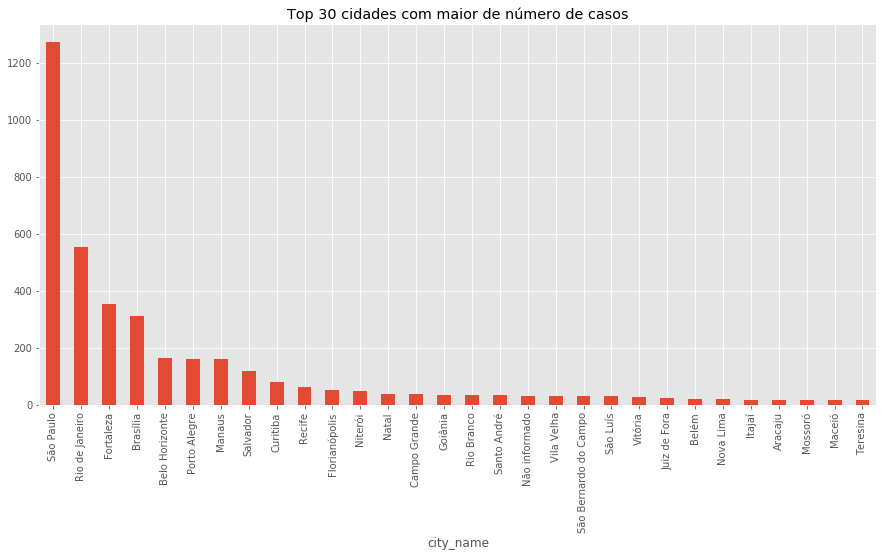

In [44]:
#plot data
top = 30
dfg1.head(top)['cases'].plot.bar()
plt.grid(True)
plt.title(f"Top {top} cidades com maior de número de casos")
plt.show()

In [45]:
def plot_city_curve(city, updated_at):
    df_ = df_json[df_json['city_name'] == city].sort_values(by='cases', ascending=True)
    df_ = df_.set_index('date')
    ax = df_.loc[:, 'count'].plot(marker='o', linestyle='-')
    ax.set_ylabel("C a s o s")
    ax.set_xlabel("D a t a")
    
    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    # Turn on the minor TICKS, which are required for the minor GRID
    ax.minorticks_on()    
    
    # Customize the major grid
    ax.grid(which='major', linestyle='-', linewidth='0.5')#, color='red')
    # Customize the minor grid
    ax.grid(which='minor', linestyle=':', linewidth='0.5')#, color='black')    
    
    plt.title(f"{city} [última atualização: {updated_at}]")
    plt.grid(True)
    plt.show()

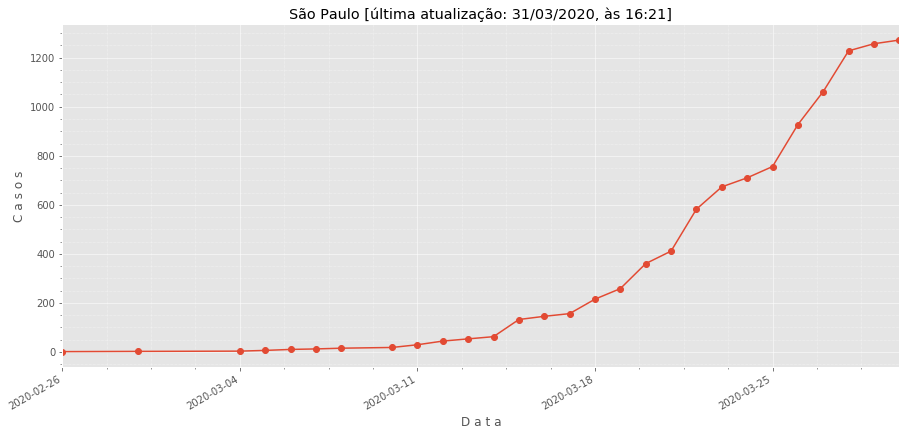

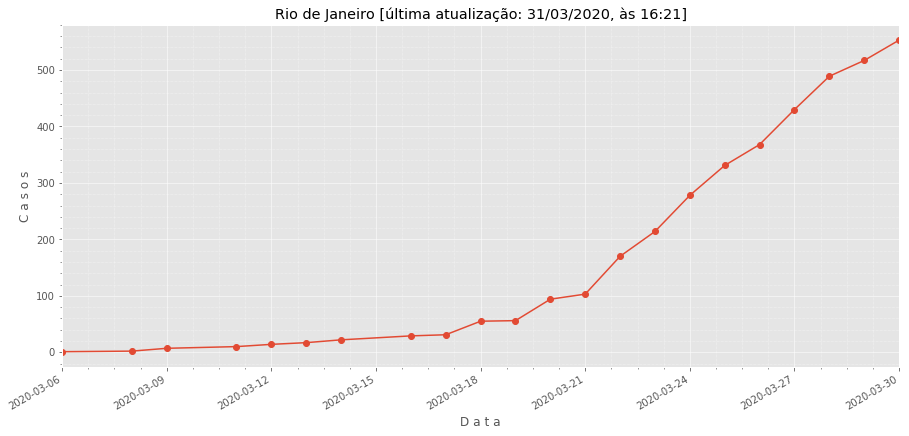

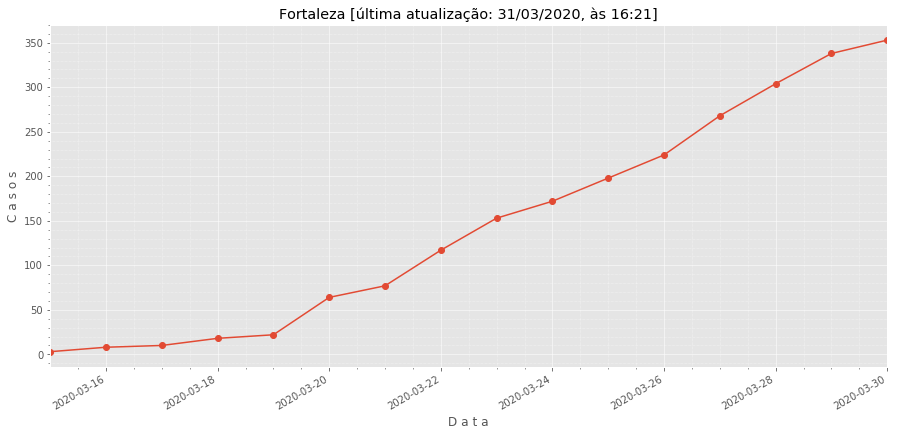

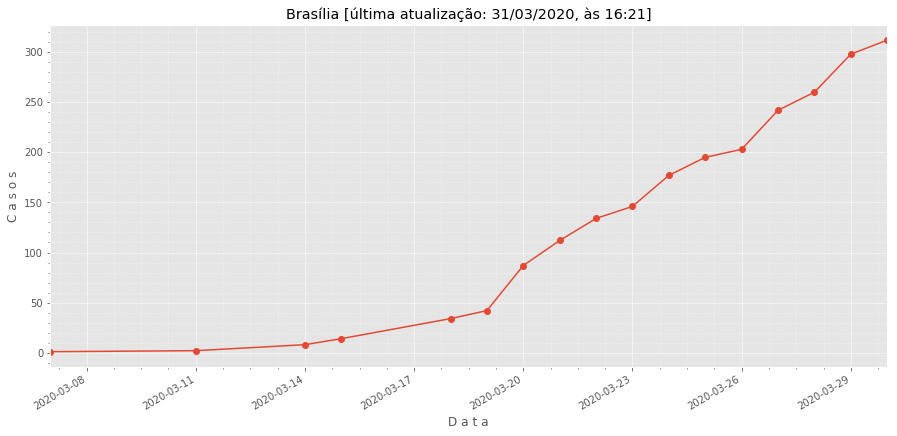

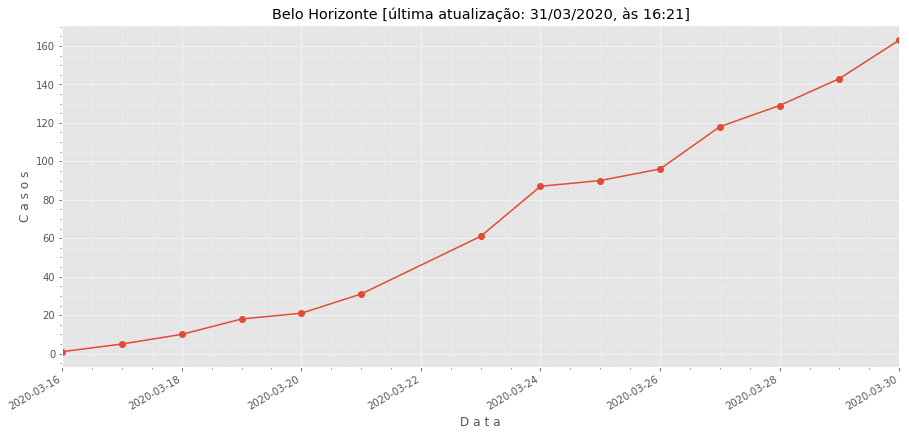

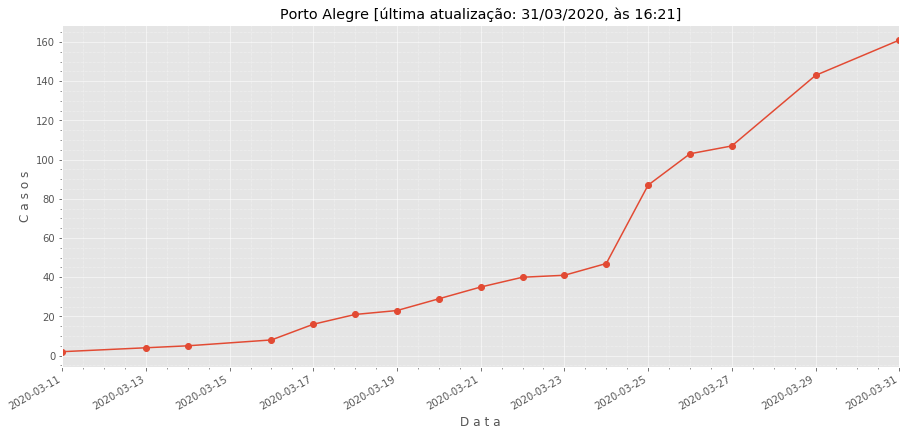

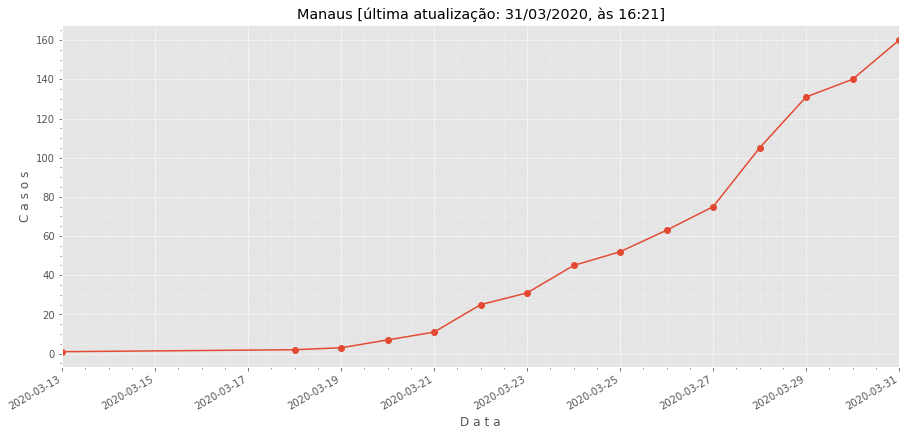

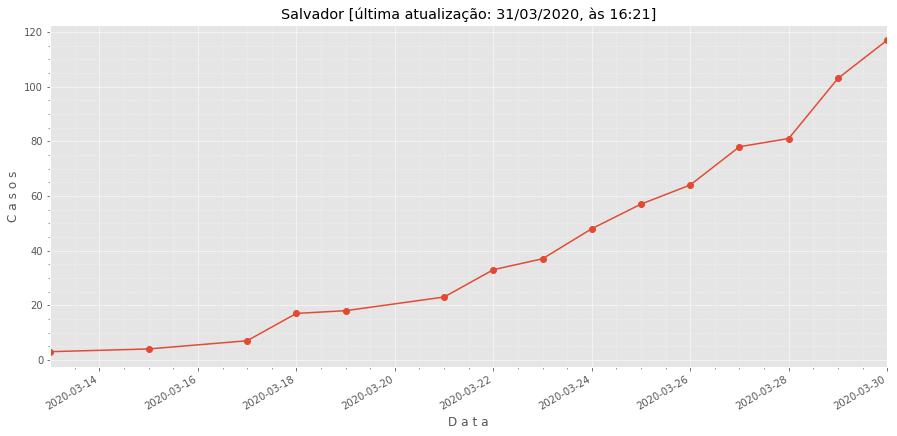

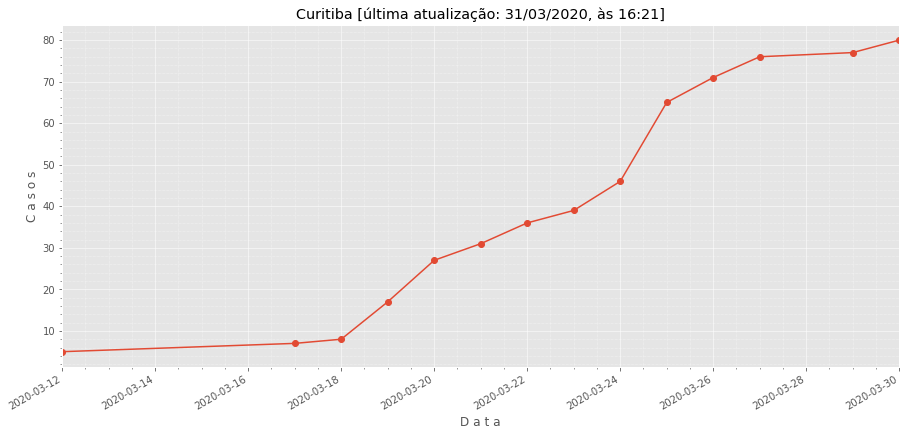

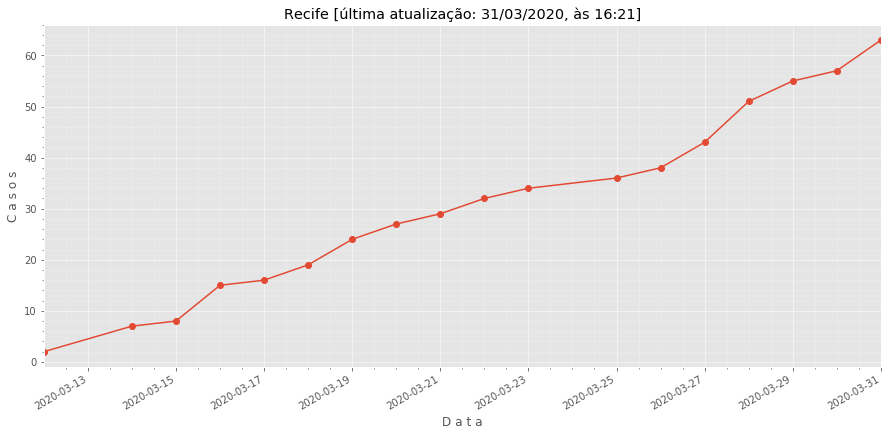

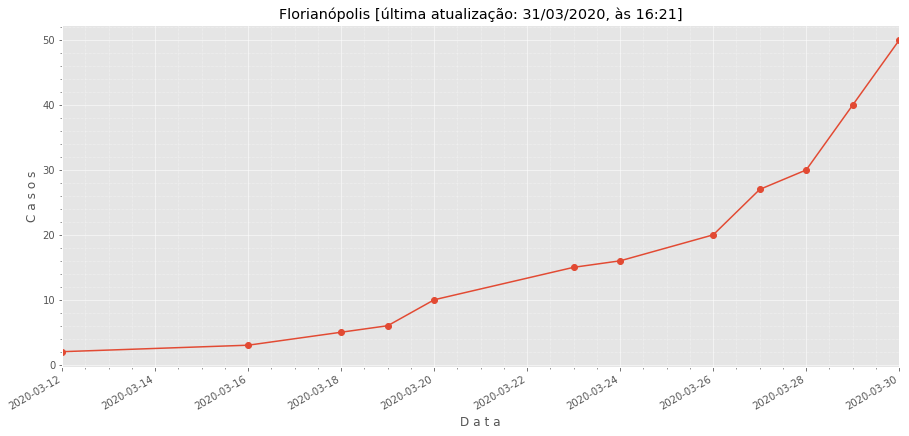

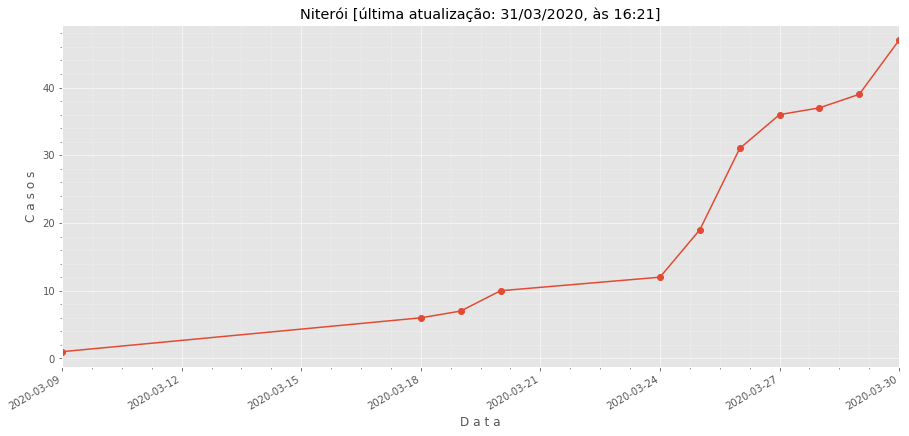

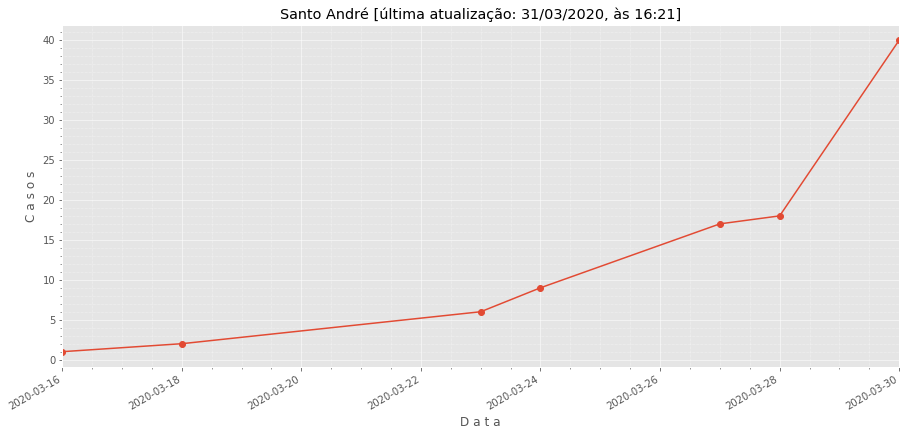

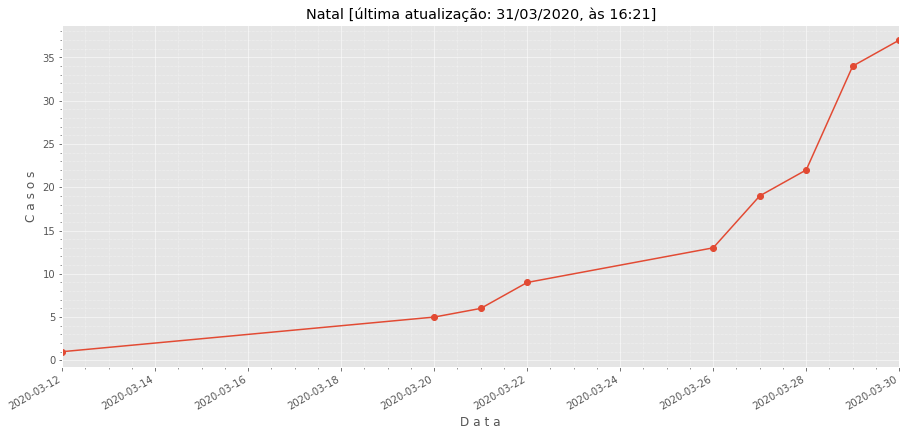

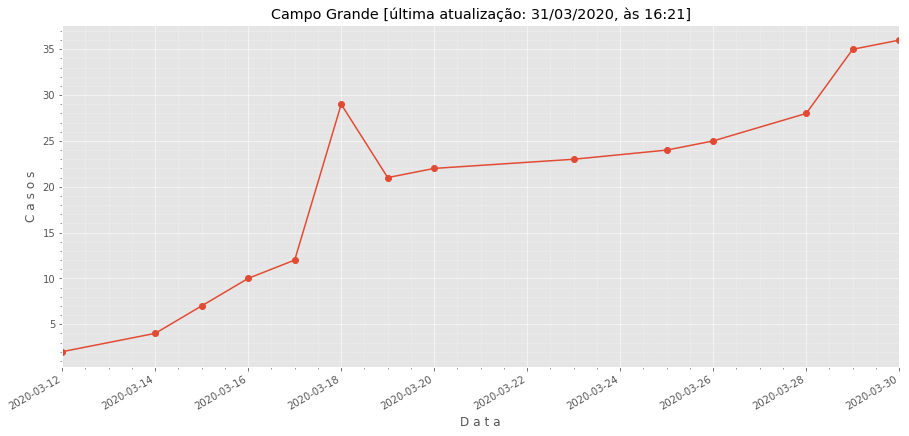

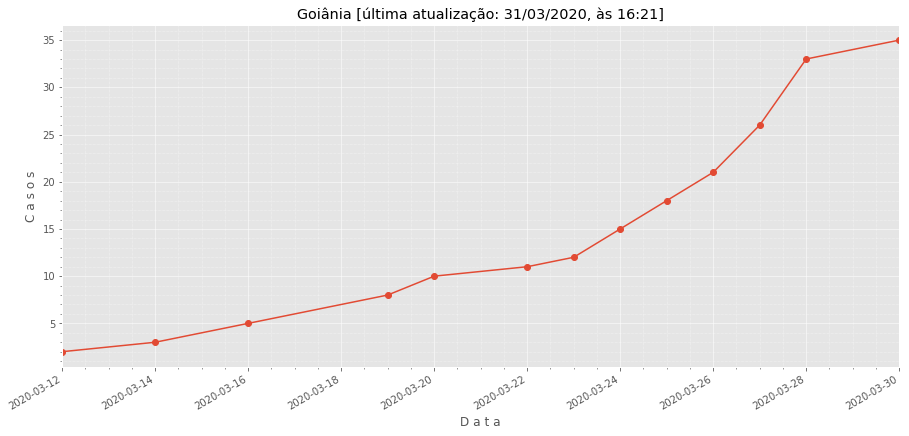

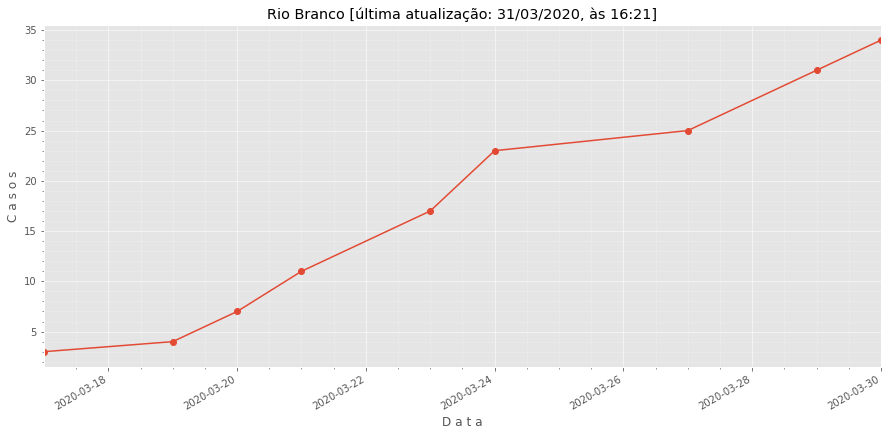

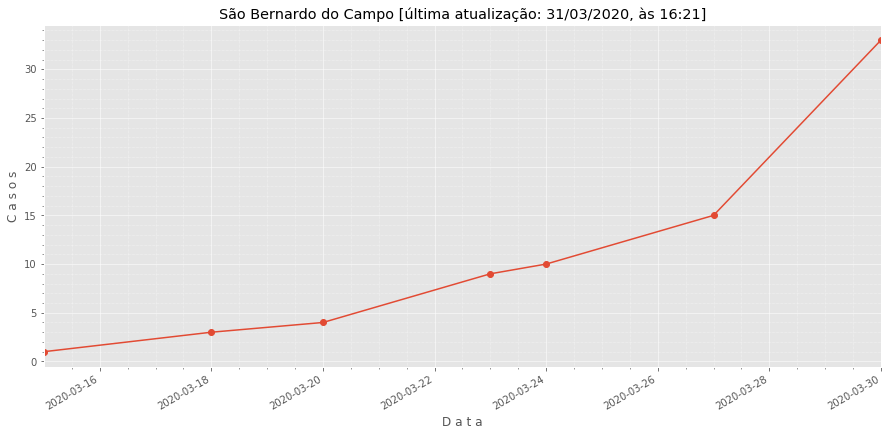

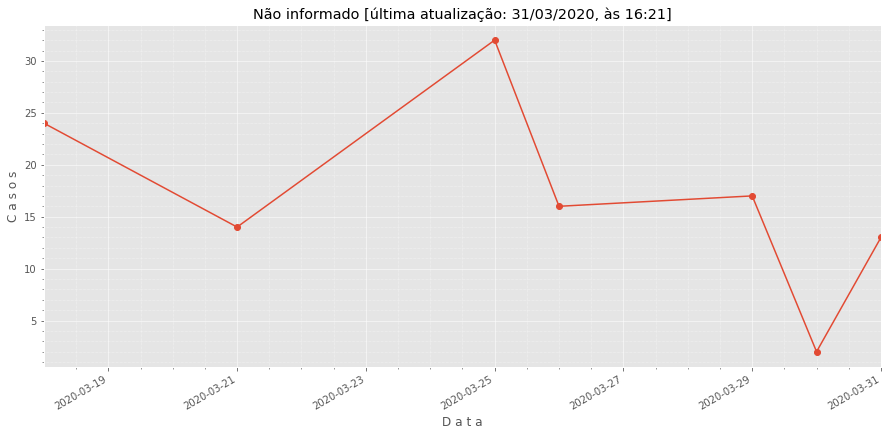

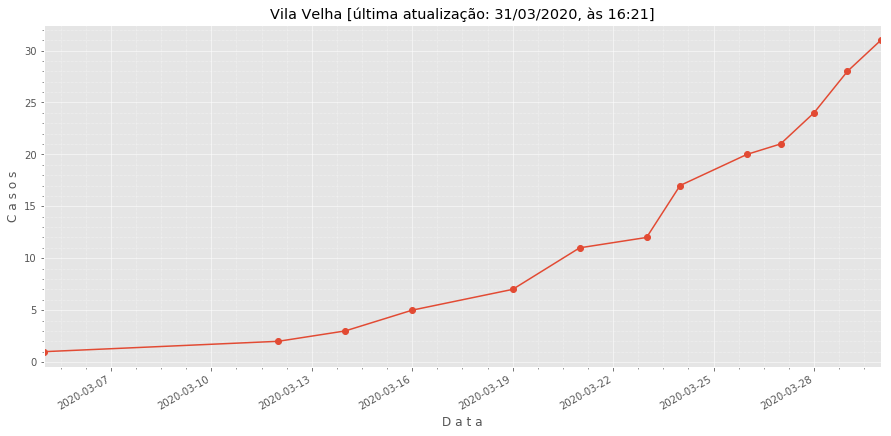

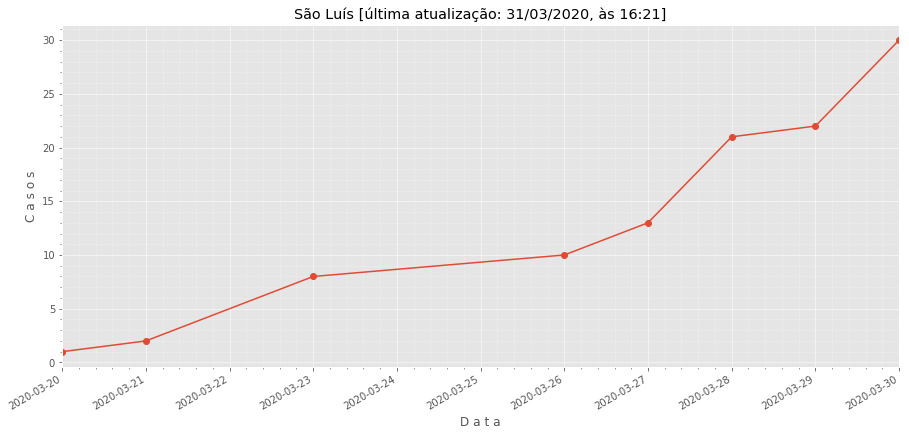

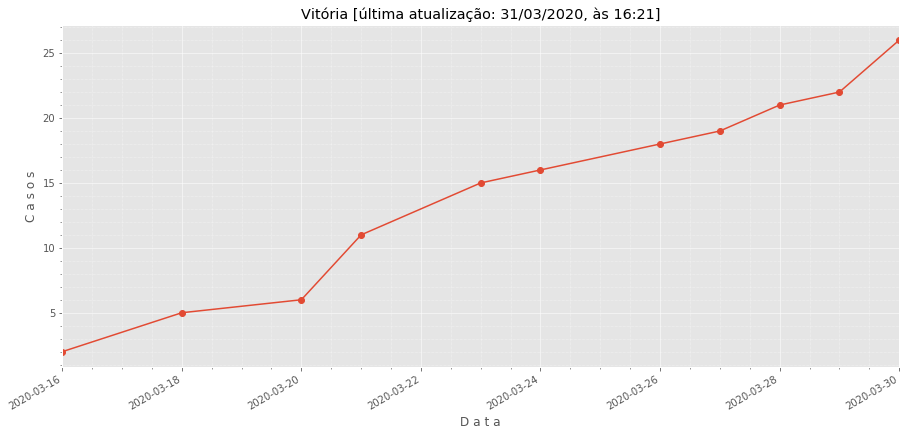

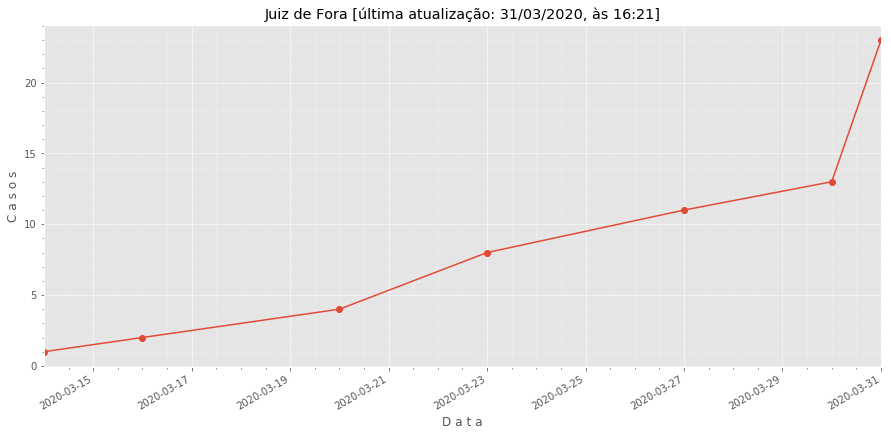

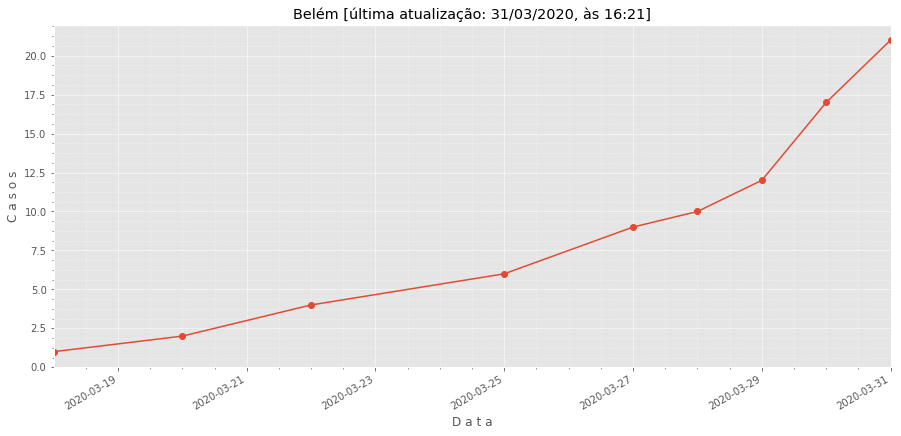

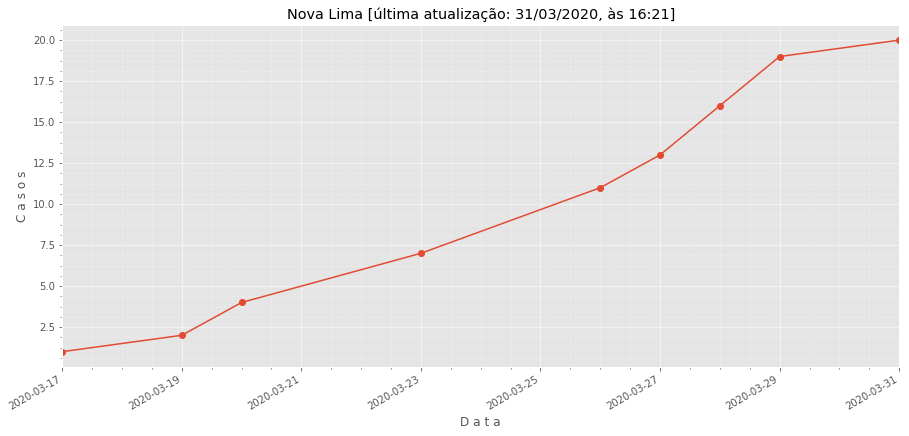

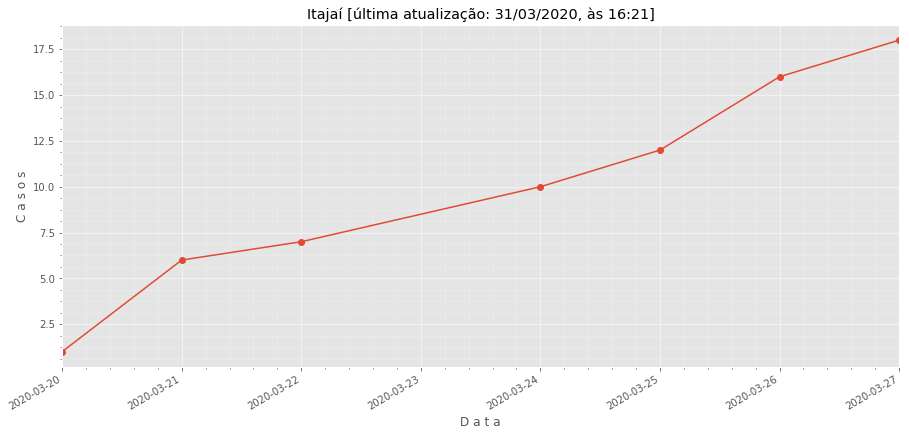

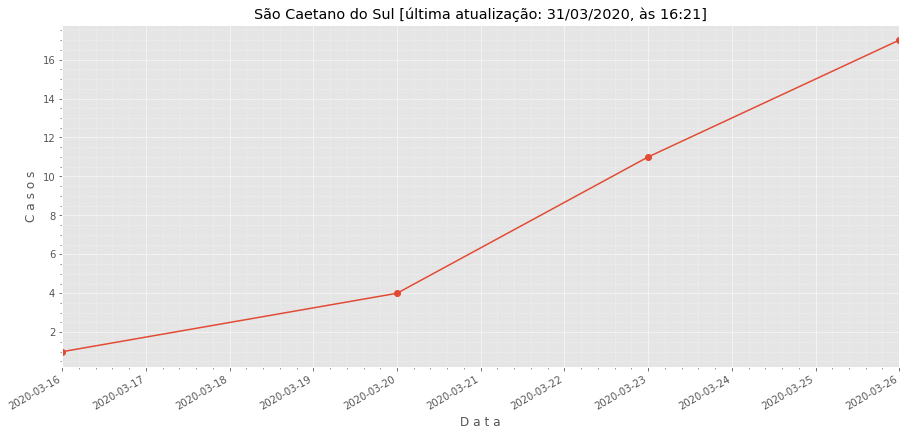

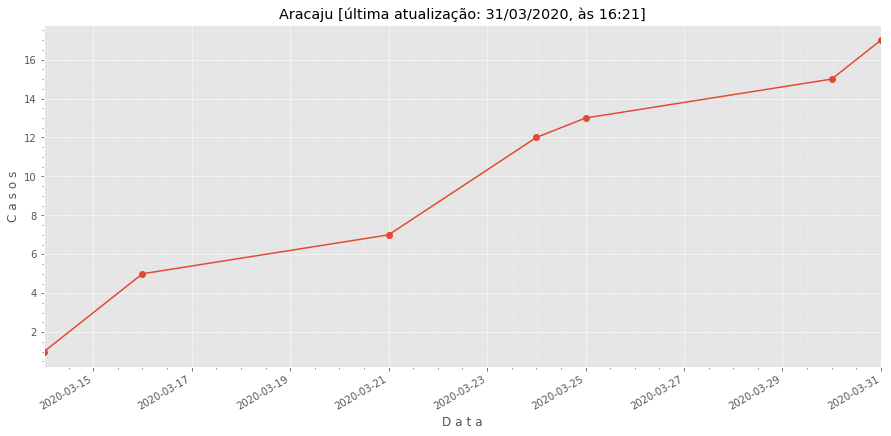

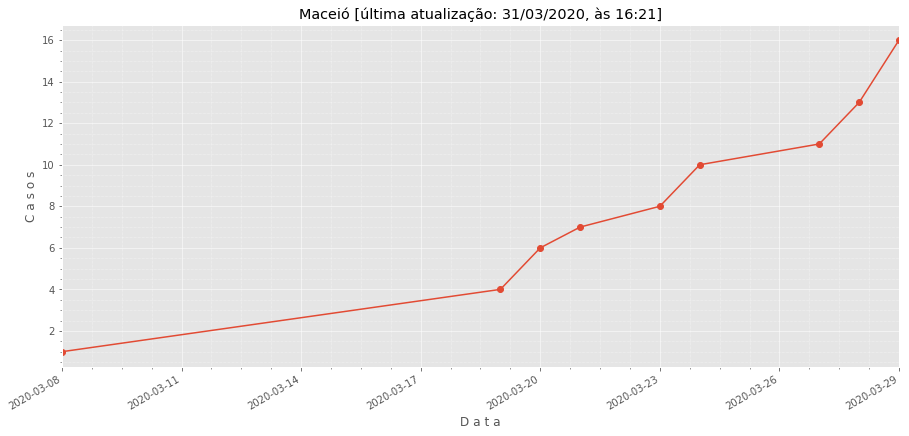

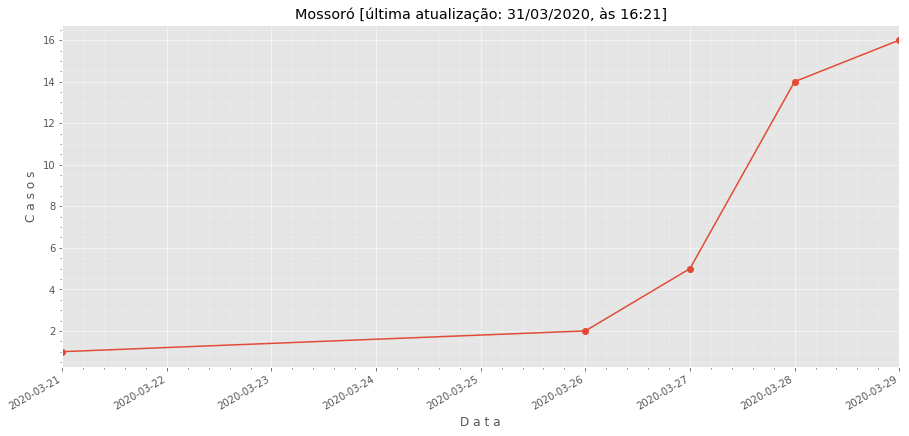

In [46]:
for city in df_json['city_name'].unique()[:top]:
    plot_city_curve(city,updated_at)

### Some checks

In [47]:
df_json['city_name'].unique()[:top]

array(['São Paulo', 'Rio de Janeiro', 'Fortaleza', 'Brasília',
       'Belo Horizonte', 'Porto Alegre', 'Manaus', 'Salvador', 'Curitiba',
       'Recife', 'Florianópolis', 'Niterói', 'Santo André', 'Natal',
       'Campo Grande', 'Goiânia', 'Rio Branco', 'São Bernardo do Campo',
       'Não informado', 'Vila Velha', 'São Luís', 'Vitória',
       'Juiz de Fora', 'Belém', 'Nova Lima', 'Itajaí',
       'São Caetano do Sul', 'Aracaju', 'Maceió', 'Mossoró'], dtype=object)

In [48]:
df_json[df_json['city_name'] == 'Blumenau'].sort_values(by='date', ascending=False)

,cases,city_cod,city_name,count,date,state,state_cod
924,2,4202404.0,Blumenau,14,2020-03-30,SC,42.0
588,3,4202404.0,Blumenau,12,2020-03-26,SC,42.0
515,2,4202404.0,Blumenau,9,2020-03-25,SC,42.0
377,1,4202404.0,Blumenau,7,2020-03-23,SC,42.0
332,6,4202404.0,Blumenau,6,2020-03-22,SC,42.0


In [49]:
df_json[df_json['city_name'] == ''].sort_values(by='date', ascending=True)

,cases,city_cod,city_name,count,date,state,state_cod


In [50]:
df_json.query('city_name == ""')

,cases,city_cod,city_name,count,date,state,state_cod
